In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
datei = "C:\\Users\\KaiTs\\Documents\\Data Science\\Datasets\\autoscout24.csv"
df = pd.read_csv(datei)

In [4]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [5]:
df.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [7]:
df.describe().round(2)

,mileage,price,hp,year
count,46405.00,46405.00,46376.00,46405.00
mean,71177.86,16572.34,132.99,2016.01
std,62625.31,19304.70,75.45,3.16
min,0.00,1100.00,1.00,2011.00
25%,19800.00,7490.00,86.00,2013.00
50%,60000.00,10999.00,116.00,2016.00
75%,105000.00,19490.00,150.00,2019.00
max,1111111.00,1199900.00,850.00,2021.00


In [8]:
df.shape


(46405, 9)

In [9]:
df.sum().isnull()


C:\Users\KaiTs\AppData\Local\Temp\ipykernel_29196\4029284745.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.sum().isnull()


mileage      False
make         False
fuel         False
offerType    False
price        False
hp           False
year         False
dtype: bool

C:\Users\KaiTs\AppData\Local\Temp\ipykernel_29196\3658891777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

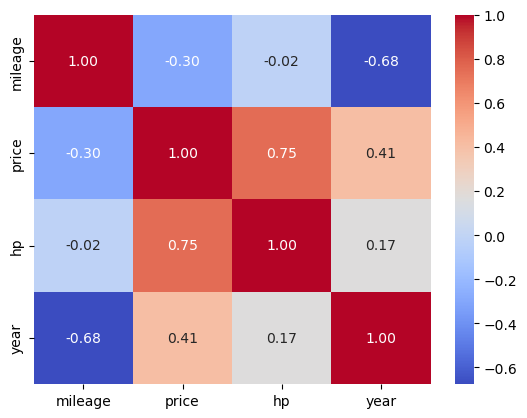

In [10]:
###Hier plotten wir eine Heatmap um die Correlationen zu erkennen
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


(2000.0, 200000.0)

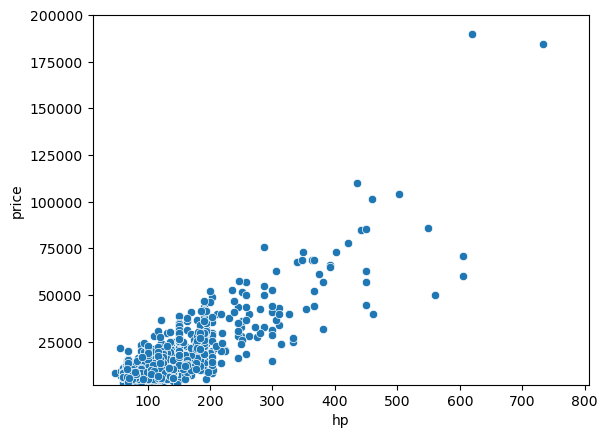

In [11]:
df_sample = df.sample(n=1000)
sns.scatterplot(data=df_sample, x='hp', y='price')
plt.ylim(2000, 200000)

##Analyse


In [12]:
unique_brands_count = df['make'].nunique()

print("Anzahl der verschiedenen Marken im Datensatz:", unique_brands_count)


Anzahl der verschiedenen Marken im Datensatz: 77


In [13]:
unique_brands = df['make'].unique()
print('Die Marken sind:', unique_brands)

Die Marken sind: ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Lada' 'Mitsubishi'
 'Others' 'Lexus' 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru'
 'Dodge' 'Microcar' 'Lamborghini' 'Baic' 'Tesla' 'Chrysler' '9ff'
 'McLaren' 'Aston' 'Rolls-Royce' 'Alpine' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Ferrari' 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou'
 'Morgan' 'Maybach' 'Tazzari' 'Trucks-Lkw' 'RAM' 'Iveco' 'DAF' 'Alpina'
 'Polestar' 'Brilliance' 'FISKER' 'Cadillac' 'Trailer-Anhänger' 'Isuzu'
 'Corvette' 'DFSK' 'Estrima']


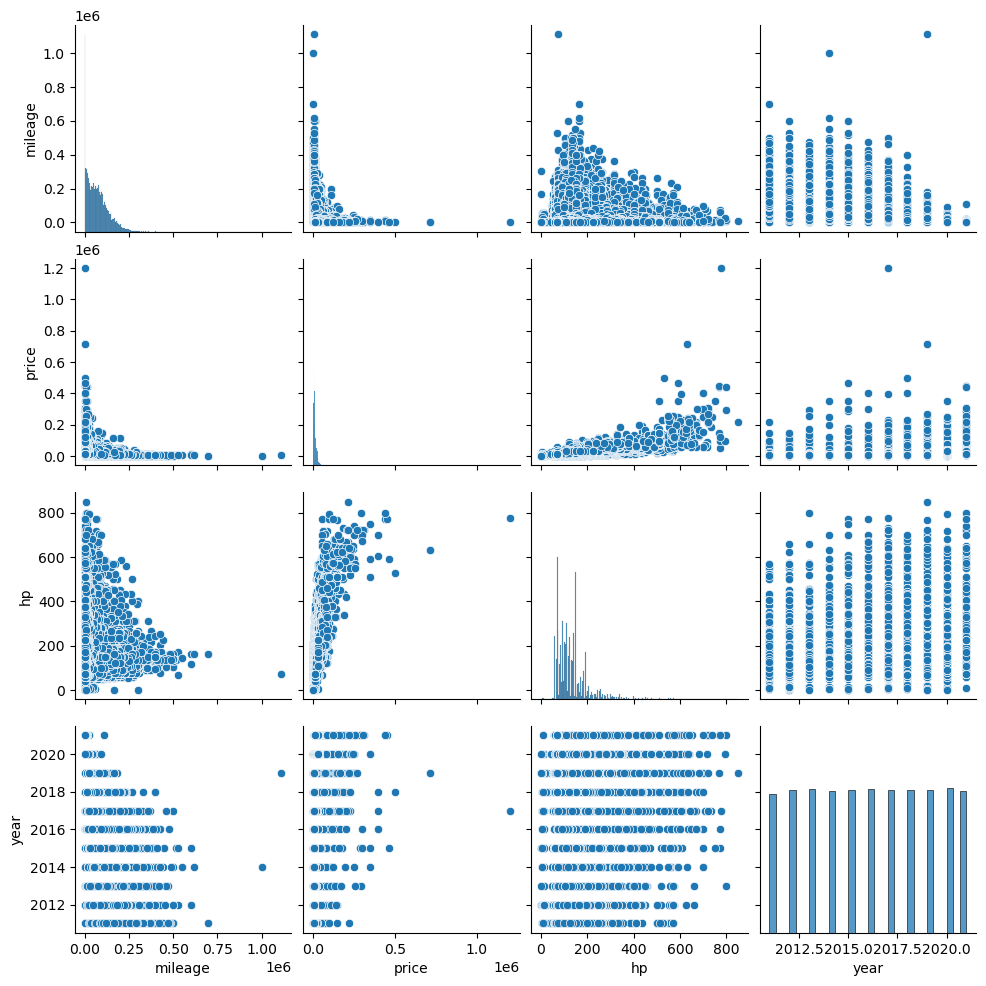

In [14]:
sns.pairplot(df)


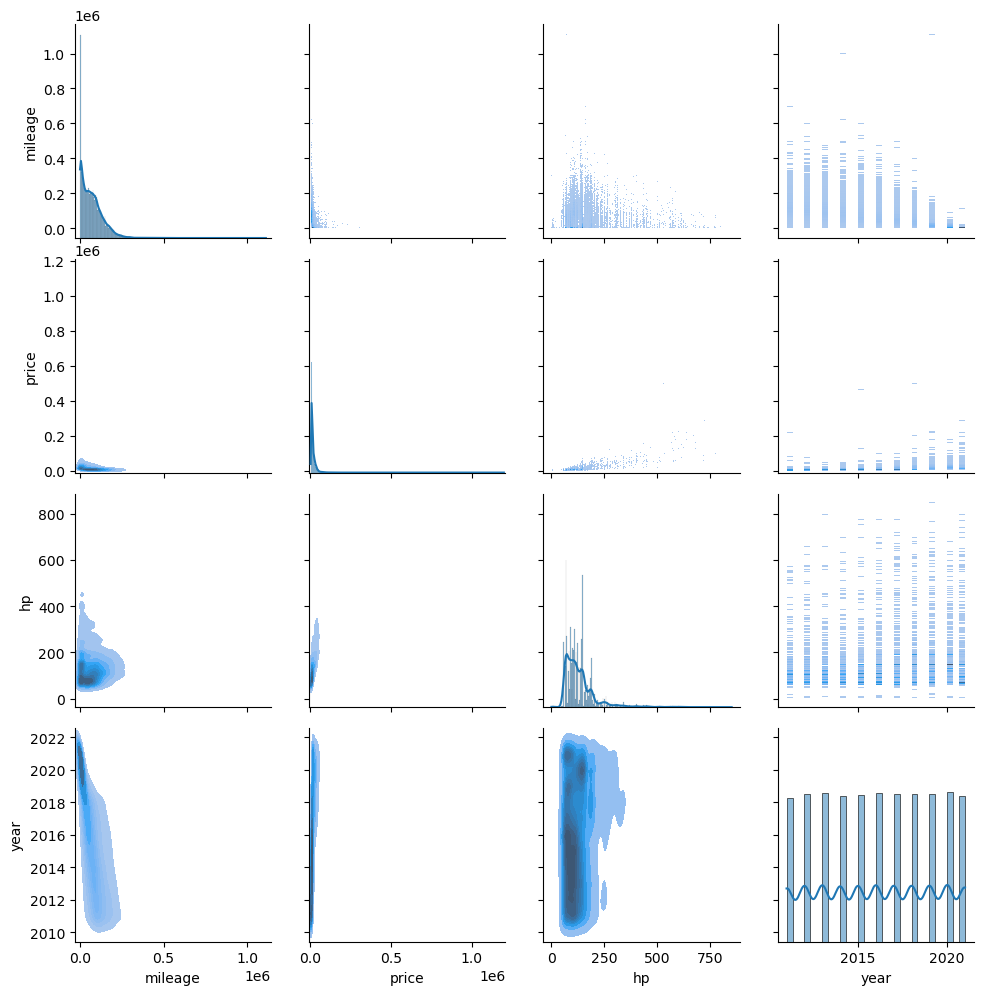

In [15]:
sns.PairGrid(df)


In [34]:
bmw = df[df['make'] == 'BMW']
av_price = bmw['price'].mean()
print("Der durschnittliche Preis z. B. eines BMW´s beträgt:", av_price)

Der durschnittliche Preis z. B. eines BMW´s beträgt: 23457.64966555184


In [37]:
brand_counts = df['make'].value_counts()
brand_counts

Volkswagen    6907
Opel          4789
Ford          4410
Skoda         2874
Renault       2792
              ... 
Isuzu            1
Others           1
Zhidou           1
Brilliance       1
Alpine           1
Name: make, Length: 71, dtype: int64

In [114]:
top_five_brands = brand_counts.head(5).index.tolist()
df_five = df[df['make'].isin(top_5_brands)]
print(df_top_5_brands.head())
df.dropna(inplace=True)

   mileage        make    model      fuel    gear offerType  price     hp  \
1    92800  Volkswagen     Golf  Gasoline  Manual      Used   6877  122.0   
3    96200     Renault   Megane  Gasoline  Manual      Used   6950  110.0   
6    91894     Renault   Scenic    Diesel  Manual      Used   6970  131.0   
7   127500        Opel   Zafira  Gasoline  Manual      Used   6972  116.0   
9      104        Ford  Transit    Diesel  Manual      Used   6990   86.0   

   year  
1  2011  
3  2011  
6  2011  
7  2011  
9  2011  


Mean Squared Error: 110537218.52679199
Predicted Price for Example Car: 32167.77784883487


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


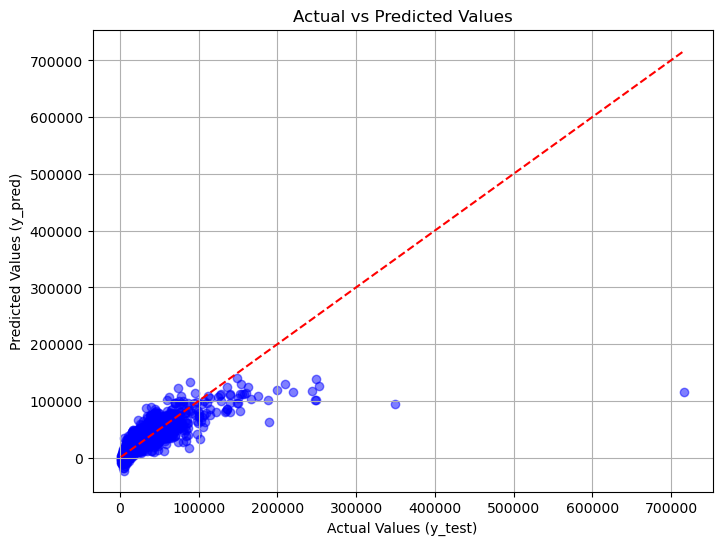

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['mileage', 'hp', 'year']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

y_pred_l_reg = l_reg.predict(X_test)


mse_l_reg = mean_squared_error(y_test, y_pred_l_reg)
print("Mean Squared Error:", mse_l_reg)


example_car_features = [[50000, 200, 2018]] 
predicted_price_l_reg = l_reg.predict(example_car_features)
print("Predicted Price for Example Car:", predicted_price_l_reg[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_l_reg, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

Mean Squared Error (Polynomial Regression): 86595849.43374956
Predicted Price for Example Car (Polynomial Regression): 27460.61743557453


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


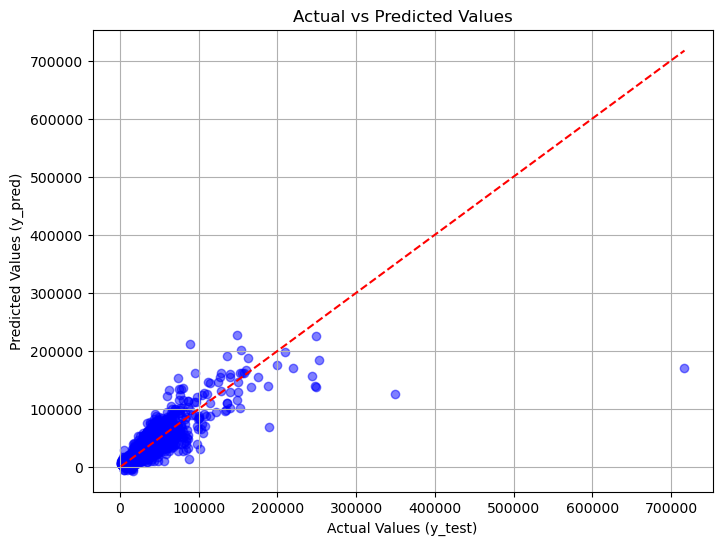

In [116]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PolynomialFeatures hinzufügen
degree = 2  # Grad des Polynoms
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Polynomiale Regression initialisieren und an Trainingsdaten anpassen
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Vorhersagen für Testdaten machen
y_pred_poly = poly_model.predict(X_test_poly)

# Leistungsmaß berechnen (zum Beispiel die mittlere quadratische Abweichung)
mse_poly_model = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly_model)

# Beispielvorhersage für ein einzelnes Auto
example_car_features = [[50000, 200, 2018]]  # Beispielwerte für Laufleistung, PS und Baujahr
example_car_features_poly = poly_features.transform(example_car_features)
predicted_price_poly = poly_model.predict(example_car_features_poly)
print("Predicted Price for Example Car (Polynomial Regression):", predicted_price_poly[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


Mean Squared Error (Random Forest Regression): 62969155.21389709
Predicted Price for Example Car (Random Forest Regression): 29853.52


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


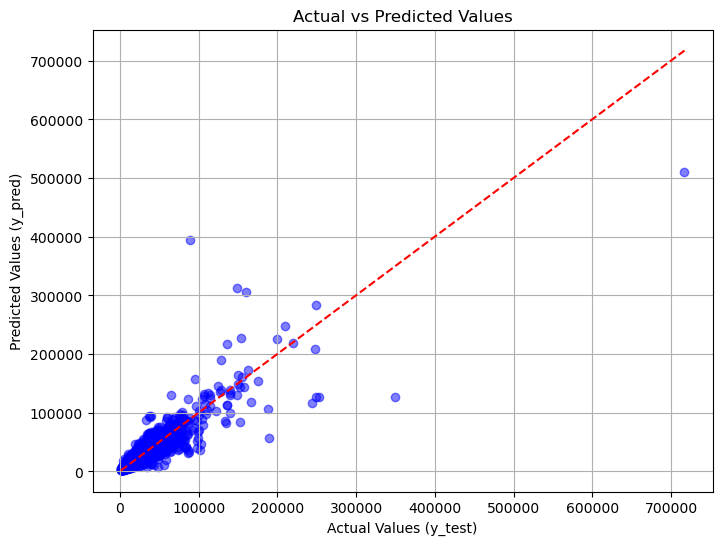

In [68]:
from sklearn.ensemble import RandomForestRegressor


# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor initialisieren und an Trainingsdaten anpassen
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Anzahl der Bäume = 100
rf.fit(X_train, y_train)

# Vorhersagen für Testdaten machen
y_pred_rf = rf.predict(X_test)

# Leistungsmaß berechnen (zum Beispiel die mittlere quadratische Abweichung)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)

# Beispielvorhersage für ein einzelnes Auto
example_car_features = [[50000, 200, 2018]]  # Beispielwerte für Laufleistung, PS und Baujahr
predicted_price_rf = rf.predict(example_car_features)
print("Predicted Price for Example Car (Random Forest Regression):", predicted_price_rf[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()



In [69]:
print("Mean Squared Error:", mse_l_reg)
print("Predicted Price for Example Car:", predicted_price_l_reg[0])

print("Mean Squared Error (Polynomial Regression):", mse_poly_model)
print("Predicted Price for Example Car (Polynomial Regression):", predicted_price_poly[0])

print("Mean Squared Error (Random Forest Regression):", mse_rf)
print("Predicted Price for Example Car (Random Forest Regression):", predicted_price_rf[0])

Mean Squared Error: 124459748.99025634
Predicted Price for Example Car: 32167.77784883487
Mean Squared Error (Polynomial Regression): 86595849.43374956
Predicted Price for Example Car (Polynomial Regression): 27460.61743557453
Mean Squared Error (Random Forest Regression): 62969155.21389709
Predicted Price for Example Car (Random Forest Regression): 29853.52


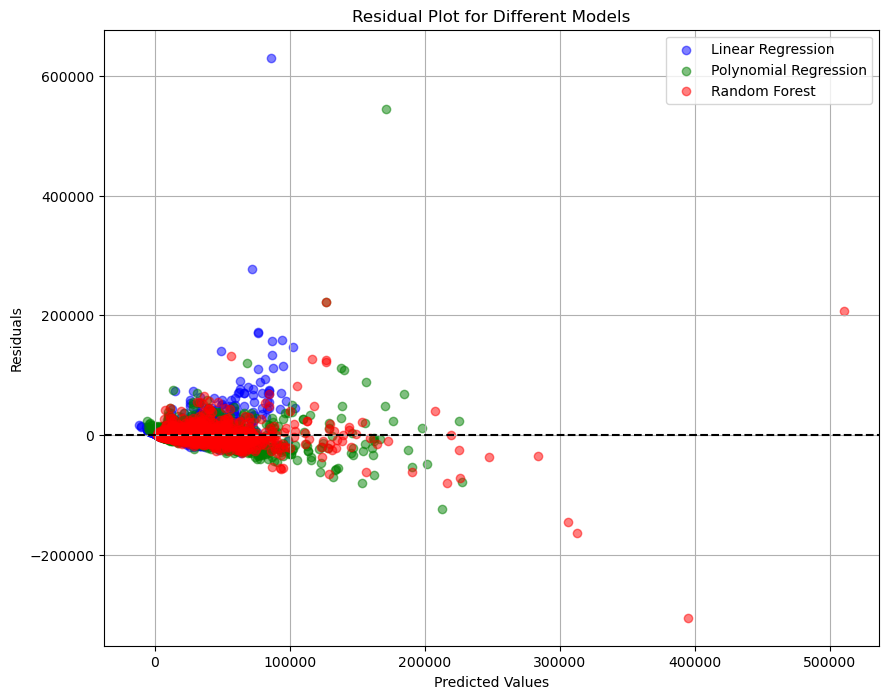

In [73]:

# Residuen berechnen
residuals_l_reg = y_test - y_pred_l_reg
residuals_poly = y_test - y_pred_poly
residuals_rf = y_test - y_pred_rf

# Residualplot erstellen
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_l_reg, residuals_l_reg, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_pred_poly, residuals_poly, color='green', alpha=0.5, label='Polynomial Regression')
plt.scatter(y_pred_rf, residuals_rf, color='red', alpha=0.5, label='Random Forest')
plt.axhline(y=0, color='black', linestyle='--')  # Nulllinie für Null-Residuen
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Different Models')
plt.legend()
plt.grid(True)
plt.show()



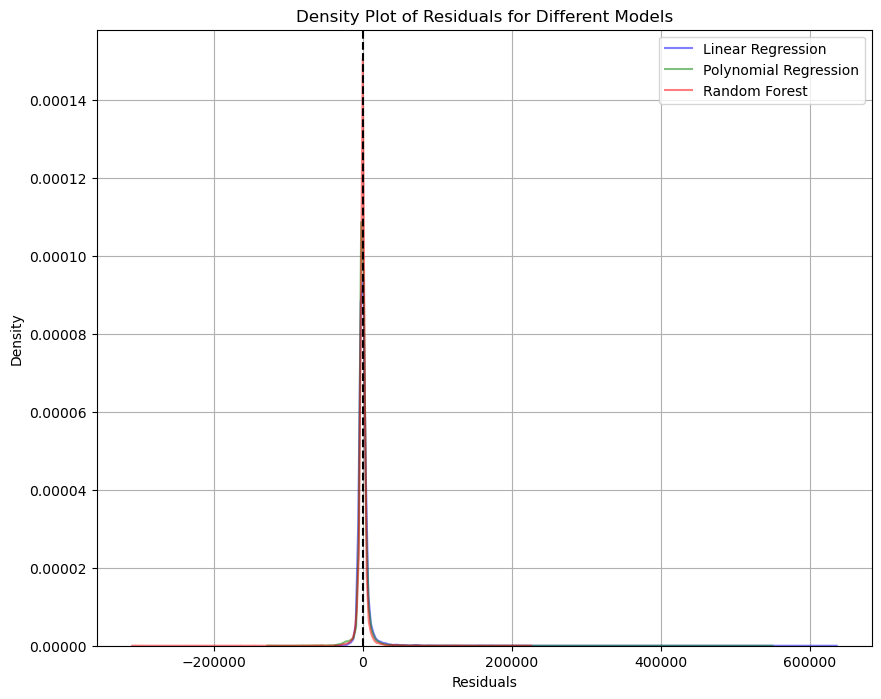

In [75]:
# Residualplot erstellen
plt.figure(figsize=(10, 8))
sns.kdeplot(residuals_l_reg, color='blue', label='Linear Regression', alpha=0.5)
sns.kdeplot(residuals_poly, color='green', label='Polynomial Regression', alpha=0.5)
sns.kdeplot(residuals_rf, color='red', label='Random Forest', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='--')  # Nulllinie für Null-Residuen
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals for Different Models')
plt.legend()
plt.grid(True)
plt.show()


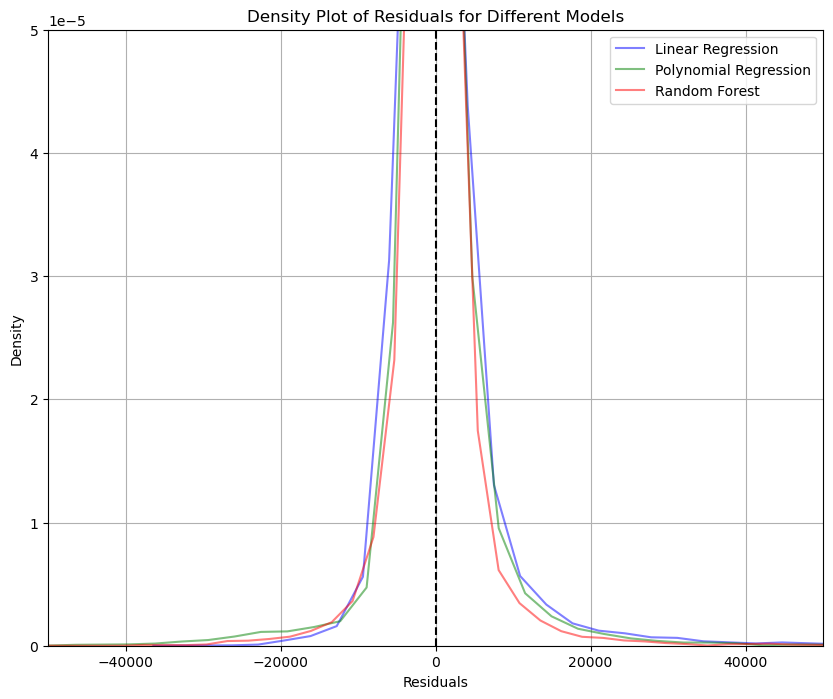

In [77]:
# Begrenzte Achsen definieren
xlim = (-50000, 50000)  # Beispielwerte, je nach Ihren Daten anpassen
ylim = (0, 0.00005)  # Beispielwerte, je nach Ihren Daten anpassen

# Residualplot erstellen mit begrenzten Achsen
plt.figure(figsize=(10, 8))
sns.kdeplot(residuals_l_reg, color='blue', label='Linear Regression', alpha=0.5)
sns.kdeplot(residuals_poly, color='green', label='Polynomial Regression', alpha=0.5)
sns.kdeplot(residuals_rf, color='red', label='Random Forest', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='--')  # Nulllinie für Null-Residuen

# Achsen begrenzen
plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [91]:
from sklearn.preprocessing import LabelEncoder

# Annahme: df ist der DataFrame mit den Autodaten

# Kopie des DataFrame erstellen, um Änderungen vorzunehmen
df_encoded = df.copy()

# Label-Encoding für jede kategorische Spalte durchführen
categorical_columns = ['gear', 'fuel', 'offerType']
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df[column])

# Zuordnung von String zu numerischem Wert für jede kategorische Spalte ausgeben
for column in categorical_columns:
    print("Zuordnung von String zu numerischem Wert für die Spalte '{}':".format(column))
    for string_value, numeric_value in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)):
        print("{}: {}".format(string_value, numeric_value))
    print()



Zuordnung von String zu numerischem Wert für die Spalte 'gear':
Automatic: 0
Manual: 1
Semi-automatic: 2

Zuordnung von String zu numerischem Wert für die Spalte 'fuel':
-/- (Fuel): 0
CNG: 1
Diesel: 2
Electric: 3
Electric/Diesel: 4
Electric/Gasoline: 5
Ethanol: 6
Gasoline: 7
Hydrogen: 8
LPG: 9
Others: 10

Zuordnung von String zu numerischem Wert für die Spalte 'offerType':
Demonstration: 0
Employee's car: 1
New: 2
Pre-registered: 3
Used: 4



C:\Users\KaiTs\AppData\Local\Temp\ipykernel_29196\467532605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_encoded.corr()


<Axes: >

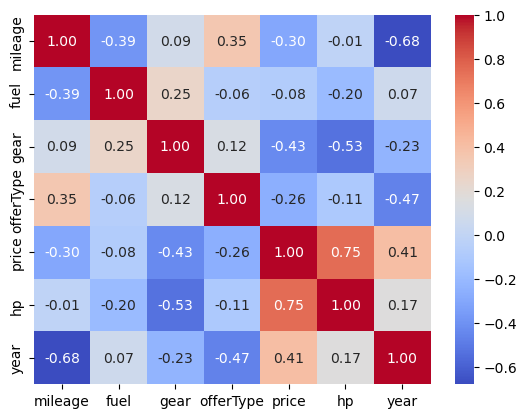

In [94]:
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [101]:
brand_counts = df_encoded['make'].value_counts()
brand_counts

top_five_brands = brand_counts.head(5).index.tolist()
df_encoded_five = df_encoded[df_encoded['make'].isin(top_5_brands)]
df_encoded_five



,mileage,make,model,fuel,gear,offerType,price,hp,year
1,92800,Volkswagen,Golf,7,1,4,6877,122.0,2011
3,96200,Renault,Megane,7,1,4,6950,110.0,2011
6,91894,Renault,Scenic,2,1,4,6970,131.0,2011
7,127500,Opel,Zafira,7,1,4,6972,116.0,2011
9,104,Ford,Transit,2,1,4,6990,86.0,2011
...,...,...,...,...,...,...,...,...,...
46376,5000,Renault,Grand Scenic,7,1,0,32480,158.0,2021
46377,100,Volkswagen,Golf,2,0,3,32490,150.0,2021
46379,6000,Renault,Kadjar,7,1,0,32680,158.0,2021
46381,4800,Volkswagen,T-Cross,7,0,0,32880,150.0,2021


Mean Squared Error: 18416327.86768854
Predicted Price for Example Car: 23322.051696527284


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


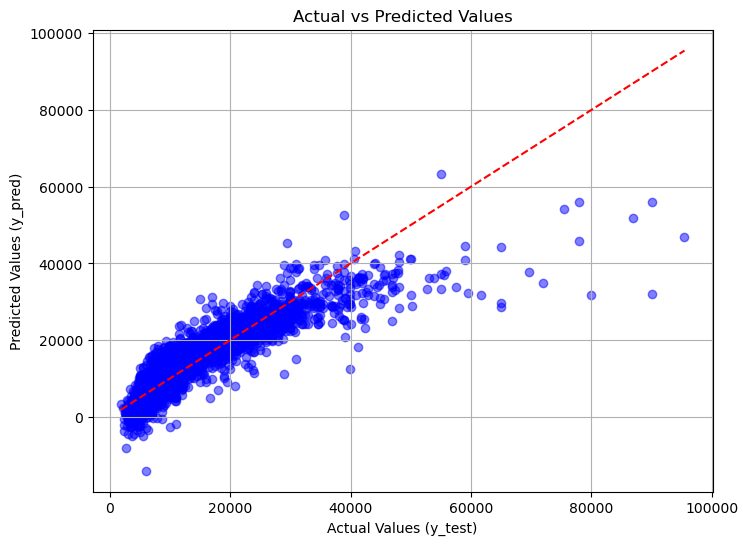

In [108]:
X = df_encoded_five[['mileage', 'hp', 'year', 'fuel', 'offerType', 'gear']]
y = df_encoded_five['price']

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineare Regression initialisieren und an Trainingsdaten anpassen
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen für Testdaten machen
y_pred = model.predict(X_test)

# Leistungsmaß berechnen (zum Beispiel die mittlere quadratische Abweichung)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Beispielvorhersage für ein einzelnes Auto
example_car_features = [[50000, 200, 2018, 2, 0, 4]]  # Beispielwerte für Laufleistung, PS und Baujahr
predicted_price = model.predict(example_car_features)
print("Predicted Price for Example Car:", predicted_price[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


Mean Squared Error (Random Forest Regression): 9480549.811898602
Predicted Price for Example Car (Random Forest Regression): 36313.15333333334


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


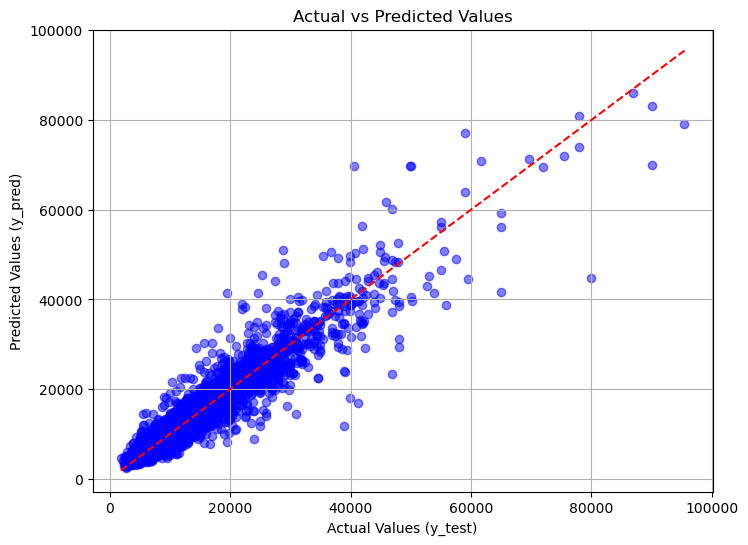

In [107]:

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor initialisieren und an Trainingsdaten anpassen
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Anzahl der Bäume = 100
rf.fit(X_train, y_train)

# Vorhersagen für Testdaten machen
y_pred_rf = rf.predict(X_test)

# Leistungsmaß berechnen (zum Beispiel die mittlere quadratische Abweichung)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)

# Beispielvorhersage für ein einzelnes Auto
example_car_features = [[50000, 200, 2018, 2, 0, 4]]  # Beispielwerte für Laufleistung, PS und Baujahr
predicted_price_rf = rf.predict(example_car_features)
print("Predicted Price for Example Car (Random Forest Regression):", predicted_price_rf[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()
